In [1]:
%pylab inline
import pandas as pd
import datetime
from collections import OrderedDict
DT = datetime.datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
class PeakSearch(object):
    def __init__(self):
        fname = "north_america_rbn_filtered.csv.bz2"

        df_0 = pd.read_csv(fname,parse_dates=['datetime'])

        keys=[]
        keys.append('datetime')
        keys.append('frequency')
        keys.append('band')
        keys.append('R_gc')
        keys.append('azm')
        keys.append('call_0')
        keys.append('lat_0')
        keys.append('lon_0')
        keys.append('call_1')
        keys.append('lat_1')
        keys.append('lon_1')
        keys.append('lat_mid')
        keys.append('lon_mid')
        keys.append('srpt_0')
        #keys.append('obs_mid_300km')
        df=df_0[keys].copy()

        def ut_hr(dt):
            result = dt.hour + dt.minute/60. + dt.second/3600.
            return result
        
        df.loc[:,'ut_hr'] = df.datetime.map(ut_hr)
        
        self.df = df
        
        self.fit_list = []

    def set_calls(self,call_0,call_1,band):
        self.call_0 = call_0
        self.call_1 = call_1
        self.band   = band
        df = self.df
        
        dft=df.copy()
        tf=dft['call_0']==call_0
        dft=dft[tf]

        tf=dft['call_1']==call_1
        dft=dft[tf]

        tf=dft['band']==band
        dft=dft[tf]
        
        self.dft = dft
        self.plot_snr(marker=None)
        
    def plot_snr(self,dt_0=None,dt_1=None,marker='o'):
        call_0 = self.call_0
        call_1 = self.call_1
        band   = self.band
        
        dft    = self.dft

        xx     = dft['datetime']
        yy     = dft['srpt_0']
        
        plt.figure(figsize=(10,8))
        plt.plot(xx,yy,marker=marker)
        plt.xlim(dt_0,dt_1)
        plt.xlabel('Time(UT)')
        plt.ylabel('SNR')
        
        title = '{!s} from {!s} at {!s} MHz'.format(call_0,call_1,band)
        plt.title(title)
        plt.grid()
        plt.show()
        
    def plot_fits(self,dts,fit_0_times,fit_1_times):
        dt_0,dt_1 = dts
        call_0 = self.call_0
        call_1 = self.call_1
        band   = self.band
        dft_1  = self.dft.copy()
        dft_1  = dft_1.sort_values('datetime')

        tf    = np.logical_and(dft_1.datetime >= dt_0, dft_1.datetime < dt_1)
        dft_1 = dft_1[tf]

        dft_1 = dft_1[ ['datetime','ut_hr','srpt_0'] ]

        ######################################
        xx=dft_1['datetime']
        yy=dft_1['srpt_0']
        ut=dft_1['ut_hr']

        fit_0_tf    = np.logical_and(dft_1.datetime >= fit_0_times[0], dft_1.datetime < fit_0_times[1])
        print(fit_0_times[0])
        print(fit_0_times[1])
        print(fit_0_tf)
        fit_0_df    = dft_1[fit_0_tf]
        print(fit_0_df)
        fit_0_coefs = np.polyfit(fit_0_df.ut_hr,fit_0_df.srpt_0,1)
        fit_0_dt    = fit_0_df['datetime']
        fit_0_xx    = fit_0_df.ut_hr
        fit_0_yy    = fit_0_coefs[0]*fit_0_df.ut_hr+fit_0_coefs[1]
        fit_0_label = 'Slope 0: {!s}'.format(fit_0_coefs[0])

        fit_1_tf    = np.logical_and(dft_1.datetime >= fit_1_times[0], dft_1.datetime < fit_1_times[1])
        print(fit_1_tf)
        fit_1_df    = dft_1[fit_1_tf]
        fit_1_coefs = np.polyfit(fit_1_df.ut_hr,fit_1_df.srpt_0,1)
        fit_1_dt    = fit_1_df['datetime']
        fit_1_xx    = fit_1_df.ut_hr
        fit_1_yy    = fit_1_coefs[0]*fit_1_df.ut_hr+fit_1_coefs[1]
        fit_1_label = 'Slope 1: {!s}'.format(fit_1_coefs[0])

        plt.figure(figsize=(10,8))
        plt.plot(xx,yy,marker='o')
        plt.plot(fit_0_df.datetime,fit_0_yy,ls='--',marker='o',label=fit_0_label)
        plt.plot(fit_1_df.datetime,fit_1_yy,ls='--',marker='o',label=fit_1_label)

        #plt.xlim(ut_hr(dt_0),ut_hr(dt_1))
        plt.xlim(dt_0,dt_1)

        plt.xlabel('Time(UT)')
        plt.ylabel('SNR')
        title = '{!s} from {!s} at {!s} MHz'.format(call_0,call_1,band)
        plt.title(title)
        plt.legend(loc='upper right')
        plt.grid()
        plt.show()
        
        fit_dct = OrderedDict()
        fit_dct['call_0']     = call_0
        fit_dct['call_1']     = call_1
        fit_dct['band']       = band
        fit_dct['fit_0_x']    = fit_0_dt.iloc[0]
        fit_dct['fit_0_y']    = fit_0_yy.iloc[0]
        fit_dct['fit_0_b']    = fit_0_coefs[0]
        fit_dct['fit_1_x']    = fit_1_dt.iloc[-1]
        fit_dct['fit_1_y']    = fit_1_yy.iloc[-1]
        fit_dct['fit_1_b']    = fit_1_coefs[0]
        
        self.fit_list.append(fit_dct)
    def fit_df(self):
        return pd.DataFrame(self.fit_list)

ps  = PeakSearch()

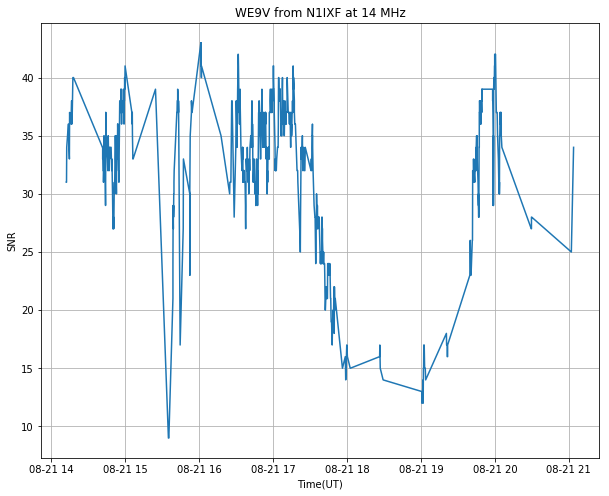

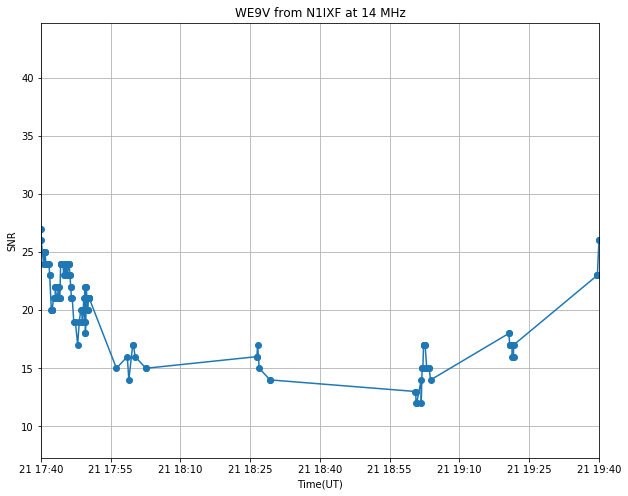

2017-08-21 17:58:00
2017-08-21 18:00:00
225030    False
225038    False
225196    False
225199    False
225360    False
225356    False
225380    False
230569    False
232192     True
232369     True
233101     True
233195     True
233435    False
235128    False
235132    False
256811    False
256809    False
256943    False
257267    False
259522    False
259550    False
Name: datetime, dtype: bool
                  datetime      ut_hr  srpt_0
232192 2017-08-21 17:58:34  17.976111    16.0
232369 2017-08-21 17:58:54  17.981667    14.0
233101 2017-08-21 17:59:44  17.995556    17.0
233195 2017-08-21 17:59:54  17.998333    17.0
225030    False
225038    False
225196    False
225199    False
225360    False
225356    False
225380    False
230569    False
232192    False
232369    False
233101     True
233195     True
233435     True
235128     True
235132     True
256811    False
256809    False
256943    False
257267    False
259522    False
259550    False
Name: datetime, dtype: bool


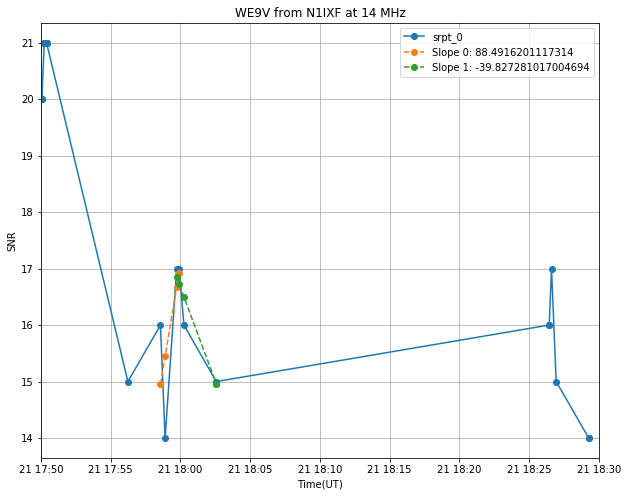

In [3]:
# This is where we set the callsigns.
ps.set_calls(call_0='WE9V',call_1='N1IXF',band=14)

# This sets the boundaries for the medium close up:
ps.plot_snr(DT(2017,8,21,17,40),DT(2017,8,21,19,40))

# This sets the boundaries for the real close-up.
dts         =(DT(2017,8,21,17,50),DT(2017,8,21,18,30))

# This sets the boundaries for the rising slope.
fit_0_times = (DT(2017,8,21,17,58,0),DT(2017,8,21,18,0,0))

# This sets the boundaries for the falling slope.
fit_1_times = (DT(2017,8,21,17,59),DT(2017,8,21,18,26))

ps.plot_fits(dts,fit_0_times,fit_1_times)

# This is a late parrot.

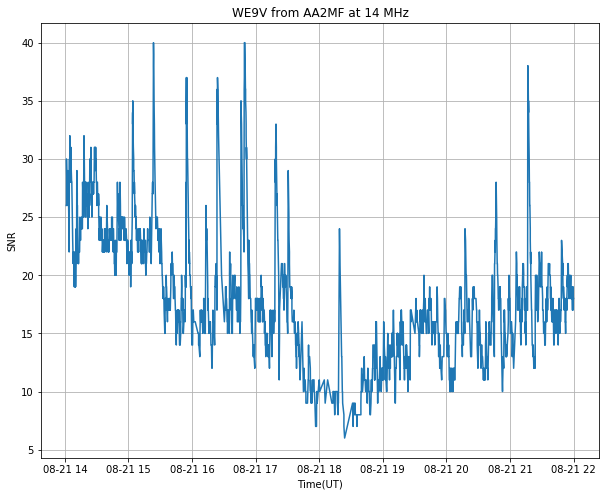

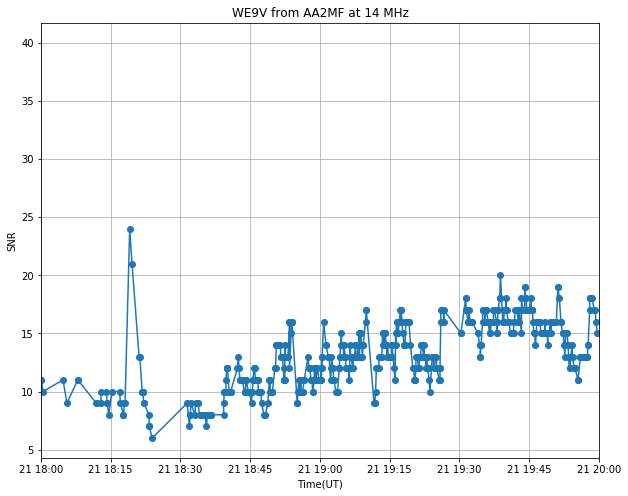

2017-08-21 18:17:45
2017-08-21 18:19:10
245704    False
247276    False
247458    False
248125     True
248152     True
248301     True
248308     True
248472     True
249620     True
250310    False
251992    False
252168    False
252640    False
252638    False
252791    False
252787    False
252789    False
252913    False
252914    False
253835    False
253838    False
253862    False
254467    False
Name: datetime, dtype: bool
                  datetime      ut_hr  srpt_0
248125 2017-08-21 18:17:45  18.295833     8.0
248152 2017-08-21 18:17:45  18.295833     8.0
248301 2017-08-21 18:17:55  18.298611     9.0
248308 2017-08-21 18:17:55  18.298611     9.0
248472 2017-08-21 18:18:05  18.301389     9.0
249620 2017-08-21 18:19:05  18.318056    24.0
245704    False
247276    False
247458    False
248125    False
248152    False
248301    False
248308    False
248472    False
249620     True
250310     True
251992     True
252168     True
252640     True
252638     True
252791     True
25

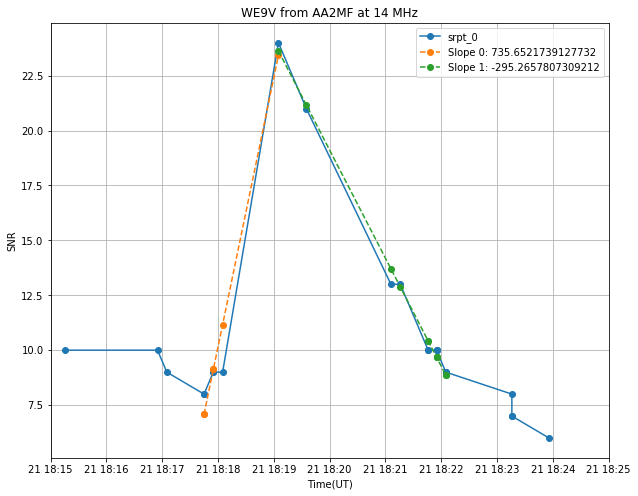

In [4]:
ps.set_calls(call_0='WE9V',call_1='AA2MF',band=14)

ps.plot_snr(DT(2017,8,21,18),DT(2017,8,21,20))

dts         = (DT(2017,8,21,18,15),   DT(2017,8,21,18,25)   )
fit_0_times = (DT(2017,8,21,18,17,45),DT(2017,8,21,18,19,10))
fit_1_times = (DT(2017,8,21,18,19),   DT(2017,8,21,18,22,30))
ps.plot_fits(dts,fit_0_times,fit_1_times)

In [ ]:
ps.fit_df()